In [1]:
width = 300

# **Расчет шума для opa177 в неинвертирующем включении**

<img src="https://drive.google.com/uc?export=view&id=1-73SpQ0fhSnAjR702grpxTEkXocCNvWz" width="300" alt="Circuit"> &nbsp; <img src="https://drive.google.com/uc?export=view&id=1u3E-_9jFY7tPZt_SNX_BK1YQ_TwV26Ay " alt="datasheet" width="300">



**Параметры LTSpice:**

* **En (Voltage Noise Density):** Плотность шумового напряжения.
* **Enk (1/f Corner Frequency for Voltage Noise):** Угловая частота 1/f шумов по напряжению.
* **In (Current Noise Density):** Плотность шумового тока.
* **Ink (1/f Corner Frequency for Current Noise):** Угловая частота 1/f шумов по току.
wd


**По datasheet:**
$$E_n=7.5\text{ nV}/\sqrt{\text{Hz}}$$
$$E_{nk}=9\text{ Hz}$$
$$E_n@1Hz=14.8\text{ nV}/\sqrt{\text{Hz}}$$

---
**Расчет значений Swhite и Sflicker:**

**Swhite** - спектральная плотность мощности белого шума

**Sflicker** - спектральная плотность мощности фликкер шума

$$S_{white}(f)=k_{0}$$
$$S_{flicker}(f)=\frac{k_{-1}}{f}$$

**Stotal** - суммарная СПМ sadsdad

$$S_{total}(f)=S_{white}(f)+S_{flicker}(f)$$

$$S_{total}(9 Hz)=E_{n}^2=7.5^2$$
$$S_{total}(1 Hz)=(E_n@1Hz)^2=14.8^2$$



**Расчет In из приведенного графика**

Самого графика In нет. Есть график En c резисторами Rs1=Rs2=200kOhm

**По datasheet:**
$$E_{n1}=100\text{ nV}/\sqrt{\text{Hz}}$$
$$E_{nk1}=150\text{ Hz}$$


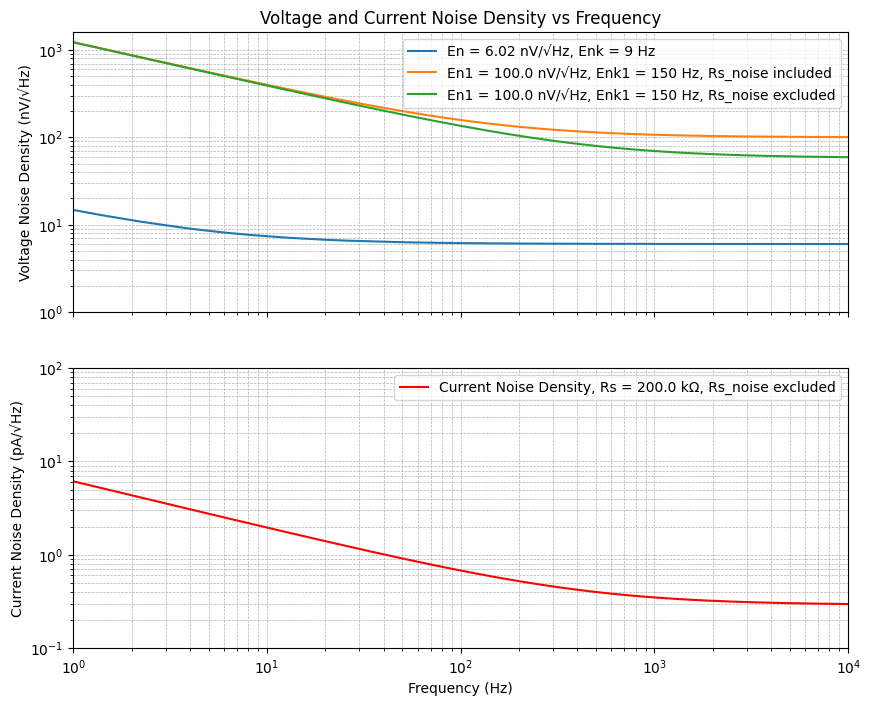

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
En = 6.02e-9  # Плотность шумового напряжения (V/√Hz)
Enk = 9  # Частота угла 1/f шума (Hz)
En1 = 100e-9
Enk1 = 150
Rs = 200e3  # сопротивление резистора (Ohm)
k_B = 1.38e-23  # постоянная Больцмана (J/K)
T = 300  # температура (K)

# Частоты от 1 Гц до 100 кГц
frequencies = np.logspace(0, 4, 400)

# Вычисление плотности шумового напряжения
# Белый шум для частот выше Enk
voltage_noise_density_white = En
voltage_noise_density_white_1 = En1
# 1/f шум для частот ниже Enk
voltage_noise_density_flicker = 13.49e-9 * np.sqrt(1/frequencies)
voltage_noise_density_flicker_1 = En1 * np.sqrt(Enk1 / frequencies)
# Полная плотность шумового напряжения
voltage_noise_density = np.sqrt((voltage_noise_density_flicker**2) + (voltage_noise_density_white**2))
voltage_noise_density_1 = np.sqrt(voltage_noise_density_flicker_1**2 + voltage_noise_density_white_1**2)
# Преобразование в нановольты и округление до 2 знаков после запятой
voltage_noise_density_nV = np.round(voltage_noise_density * 1e9, 2)
voltage_noise_density_nV_1 = np.round(voltage_noise_density_1 * 1e9, 2)

# Вычитание теплового шума самого резистора
thermal_noise_power = 4 * k_B * T * Rs*2 # шум двух резисторов
voltage_noise_power_1 = voltage_noise_density_1**2
voltage_noise_power_2 =voltage_noise_power_1 - thermal_noise_power
voltage_noise_density_2 = np.sqrt(voltage_noise_power_2)

voltage_noise_density_nV_2 = np.round(voltage_noise_density_2 * 1e9, 2)

current_noise_density_1= voltage_noise_density_1 / Rs #шум с учетом шума резисторов Rs
current_noise_density_2 = voltage_noise_density_2 / Rs # шум с вычетом шума резисторов Rs
# Построение графиков
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8), sharex=True)

# Первый subplot для плотности шумового напряжения
ax1.loglog(frequencies, voltage_noise_density_nV, label=f'En = {round(En*1e9, 2)} nV/√Hz, Enk = {Enk} Hz')
ax1.loglog(frequencies, voltage_noise_density_nV_1, label=f'En1 = {round(En1*1e9, 2)} nV/√Hz, Enk1 = {Enk1} Hz, Rs_noise included')
ax1.loglog(frequencies, voltage_noise_density_nV_2, label=f'En1 = {round(En1*1e9, 2)} nV/√Hz, Enk1 = {Enk1} Hz, Rs_noise excluded')
ax1.set_ylabel('Voltage Noise Density (nV/√Hz)')
ax1.set_title('Voltage and Current Noise Density vs Frequency')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend()
ax1.set_yticks([1, 10, 100, 1000])
ax1.set_xlim([1, frequencies[-1]])

# Второй subplot для плотности шума тока
ax2.loglog(frequencies, current_noise_density_2 * 1e12, 'r-', label=f'Current Noise Density, Rs = {Rs / 1e3} kΩ, Rs_noise excluded')
# ax2.loglog(frequencies, current_noise_density_1 * 1e12, 'b-', label=f'Current Noise Density, Rs = {Rs / 1e3} kΩ, Rs_noise included')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Current Noise Density (pA/√Hz)')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend()
ax2.set_yticks([0.1, 1, 10, 100])

plt.show()
